In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Boosting
- 기본적인 앙상블 모델인 랜덤포레스트에 성능 향상을 위한 기능을 추가한 것
- 랜덤 포레스트 방식으로 학습을 하지만 잘못 예측하는 데이터에 대해 보다 잘 예측할 수 있도록 오차를 보정해나가는 방식
- AdaBoosting : 최초의 부스팅 알고리즘
- GradientBoosting : AdaBoosting에서 가중치 계산 방법을 개선한 알고리즘
- Light Gradient Boosting : GradientBoosting의 성능을 약간 낮추면서 속도를 바르게한 알고리즘
- XGBoost : Kaggle에서 고안한 알고리즘. GradientBoosting 보다 성능이 더 잘 나오도록 개선하면서 CPU의 병렬처리와 GPU 사용을 지원함으로써 속도를 개선시킨 알고리즘

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
# 문자열 -> 숫자
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)

In [5]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [6]:
print(X)
print(y)

[[ 1.0716471  -2.11021126  1.24691885 ...  2.21627442  2.57629265
   1.89296305]
 [ 1.80872514 -0.29975355  1.665741   ...  1.02843583 -0.29491256
   0.27048275]
 [ 1.55731868  0.55280299  1.54548514 ...  1.88116631  1.04374227
   0.19229093]
 ...
 [ 1.52874976  1.47150615  1.4501098  ...  0.43900458 -1.00379467
  -1.25588676]
 [-0.63963097  2.26281581 -0.66183197 ... -0.68959168 -0.76491536
  -0.11396037]
 [ 0.0831626  -1.22825622  0.04684827 ... -0.15491471 -0.51828023
  -0.32247189]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1

### 기본 모델을 통한 교차 검증

In [7]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [8]:
model1 = AdaBoostClassifier(random_state=1)
ada_result = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 성능 수치 : {ada_result.mean()}')

평균 성능 수치 : 0.9493921221111193


In [9]:
model2 = GradientBoostingClassifier(random_state=1)
GB_result = cross_val_score(model2, X, y, scoring='f1', cv=kfold)
print(f'평균 성능 수치 : {GB_result.mean()}')

평균 성능 수치 : 0.9447595182774707


In [10]:
model3 = LGBMClassifier(random_state=1)
lgb_result = cross_val_score(model3, X, y, scoring='f1', cv=kfold)
print(f'평균 성능 수치 : {lgb_result.mean()}')

평균 성능 수치 : 0.9494792940527012


In [11]:
model4 = XGBClassifier(random_state=1, silent=True, verbosity=0)
xgb_result = cross_val_score(model4, X, y, scoring='f1', cv=kfold)
print(f'평균 성능 수치 : {xgb_result.mean()}')

평균 성능 수치 : 0.9522813855211677


### 하이퍼 파라미터 튜닝

In [12]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model1 = AdaBoostClassifier(random_state=1)
grid1 = GridSearchCV(tmp_model1, param_grid=params, scoring='f1', cv=kfold)
grid1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.962946361239335


In [13]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model2 = GradientBoostingClassifier(random_state=1)
grid2 = GridSearchCV(tmp_model2, param_grid=params, scoring='f1', cv=kfold)
grid2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.9473189410278952


In [14]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model3 = LGBMClassifier(random_state=1)
grid3 = GridSearchCV(tmp_model3, param_grid=params, scoring='f1', cv=kfold)
grid3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.9494792940527012


In [15]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
# booster : 내부에서 사용할 알고리즘(gbtree - 트리, gblinear - 선형)
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    'booster' : ['gbtree', 'gblinear']
}

tmp_model4 = XGBClassifier(random_state=1, silent=True, verbosity=0)
grid4 = GridSearchCV(tmp_model4, param_grid=params, scoring='f1', cv=kfold)
grid4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gblinear', 'learning_rate': 0.01, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.968045891911621


In [16]:
print(f'AdaBoost Basic : {ada_result.mean()}')
print(f'GradientBoost Basic : {GB_result.mean()}')
print(f'LGB Basic : {lgb_result.mean()}')
print(f'XGBoost Basic : {xgb_result.mean()}')
print(f'AdaBoost Tuning : {grid1.best_score_}')
print(f'GradientBoost Tuning : {grid2.best_score_}')
print(f'LGB Tuning : {grid3.best_score_}')
print(f'XGBoost Tuning : {grid4.best_score_}')

AdaBoost Basic : 0.9493921221111193
GradientBoost Basic : 0.9447595182774707
LGB Basic : 0.9494792940527012
XGBoost Basic : 0.9522813855211677
AdaBoost Tuning : 0.962946361239335
GradientBoost Tuning : 0.9473189410278952
LGB Tuning : 0.9494792940527012
XGBoost Tuning : 0.968045891911621


### 최종 평가를 수행한다.

In [17]:
best_model1 = grid1.best_estimator_
best_model2 = grid2.best_estimator_
best_model3 = grid3.best_estimator_
best_model4 = grid4.best_estimator_

In [18]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# 학습용 데이터로 학습을 시킨다.
best_model1.fit(X_train, y_train)
best_model2.fit(X_train, y_train)
best_model3.fit(X_train, y_train)
best_model4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=12, num_parallel_tree=None,
              predictor=None, random_state=1, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, silent=True, subsample=None, tree_method=None,
              validate_parameters=1, verbosity=0)

In [20]:
# 학습용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_train)
y_pred2 = best_model2.predict(X_train)
y_pred3 = best_model3.predict(X_train)
y_pred4 = best_model4.predict(X_train)

In [21]:
r1 = accuracy_score(y_train, y_pred1)
r2 = precision_score(y_train, y_pred1)
r3 = recall_score(y_train, y_pred1)
r4 = f1_score(y_train, y_pred1)
r5 = roc_auc_score(y_train, y_pred1)

print('AdaBoost 학습 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

AdaBoost 학습 데이터 평가
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0


In [22]:
r1 = accuracy_score(y_train, y_pred2)
r2 = precision_score(y_train, y_pred2)
r3 = recall_score(y_train, y_pred2)
r4 = f1_score(y_train, y_pred2)
r5 = roc_auc_score(y_train, y_pred2)

print('GradientBoost 학습 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

GradientBoost 학습 데이터 평가
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0


In [23]:
r1 = accuracy_score(y_train, y_pred3)
r2 = precision_score(y_train, y_pred3)
r3 = recall_score(y_train, y_pred3)
r4 = f1_score(y_train, y_pred3)
r5 = roc_auc_score(y_train, y_pred3)

print('LGBM 학습 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

LGBM 학습 데이터 평가
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
roc_auc : 1.0


In [24]:
r1 = accuracy_score(y_train, y_pred4)
r2 = precision_score(y_train, y_pred4)
r3 = recall_score(y_train, y_pred4)
r4 = f1_score(y_train, y_pred4)
r5 = roc_auc_score(y_train, y_pred4)

print('XGBoost 학습 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

XGBoost 학습 데이터 평가
accuracy : 0.9852941176470589
precision : 0.9929078014184397
recall : 0.9722222222222222
f1 : 0.9824561403508771
roc_auc : 0.9835600907029479


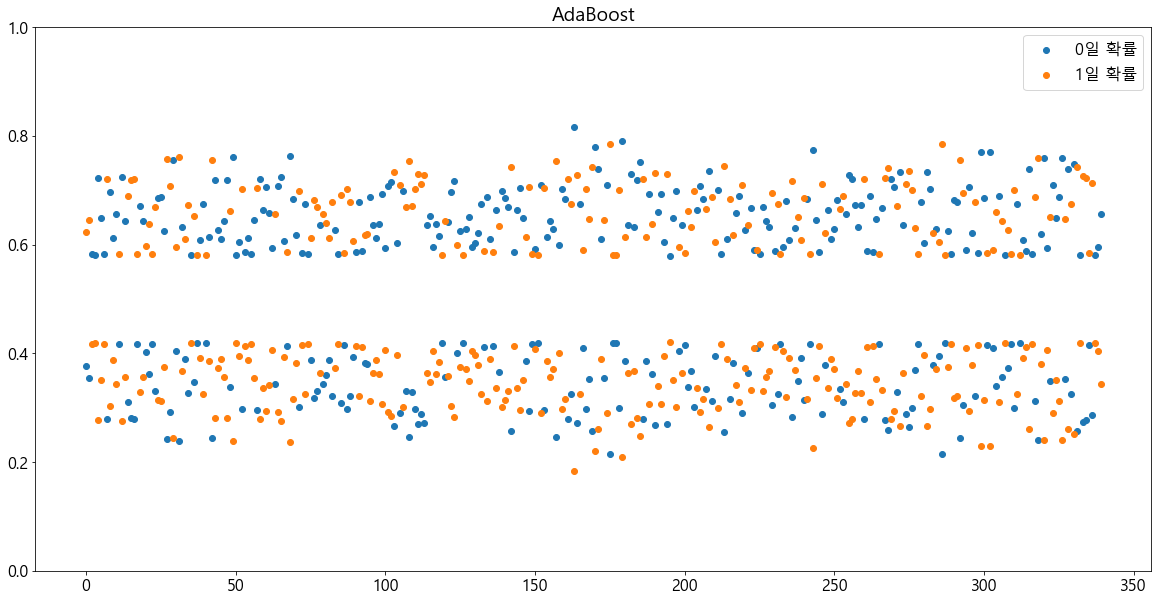

In [26]:
proba1 = best_model1.predict_proba(X_train)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('AdaBoost')
plt.legend()
plt.ylim(0, 1)
plt.show()

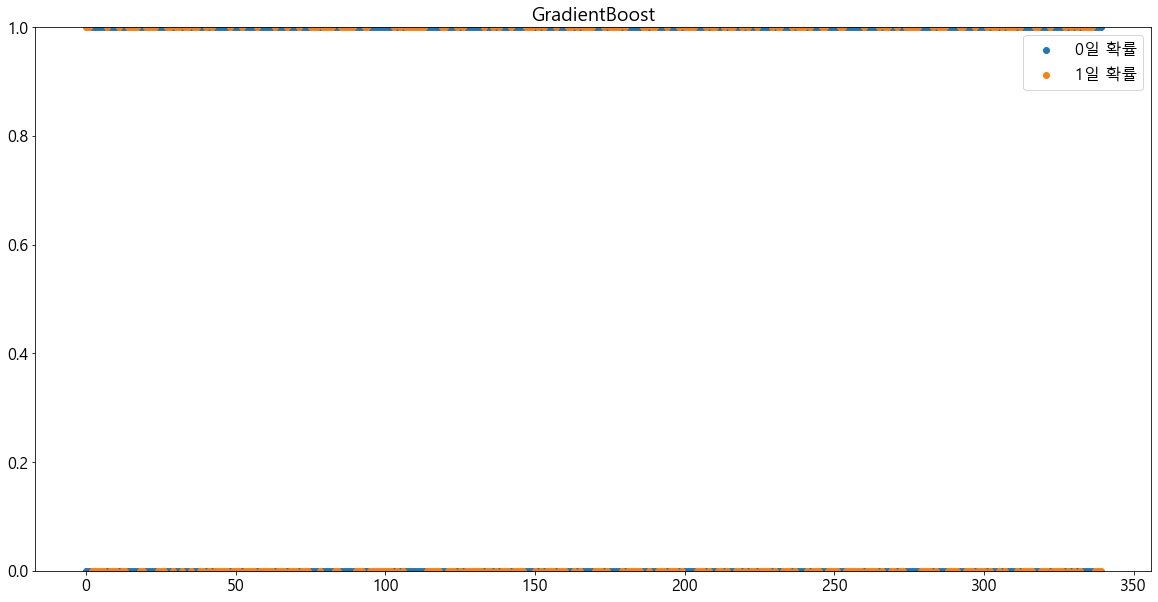

In [27]:
proba1 = best_model2.predict_proba(X_train)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('GradientBoost')
plt.legend()
plt.ylim(0, 1)
plt.show()

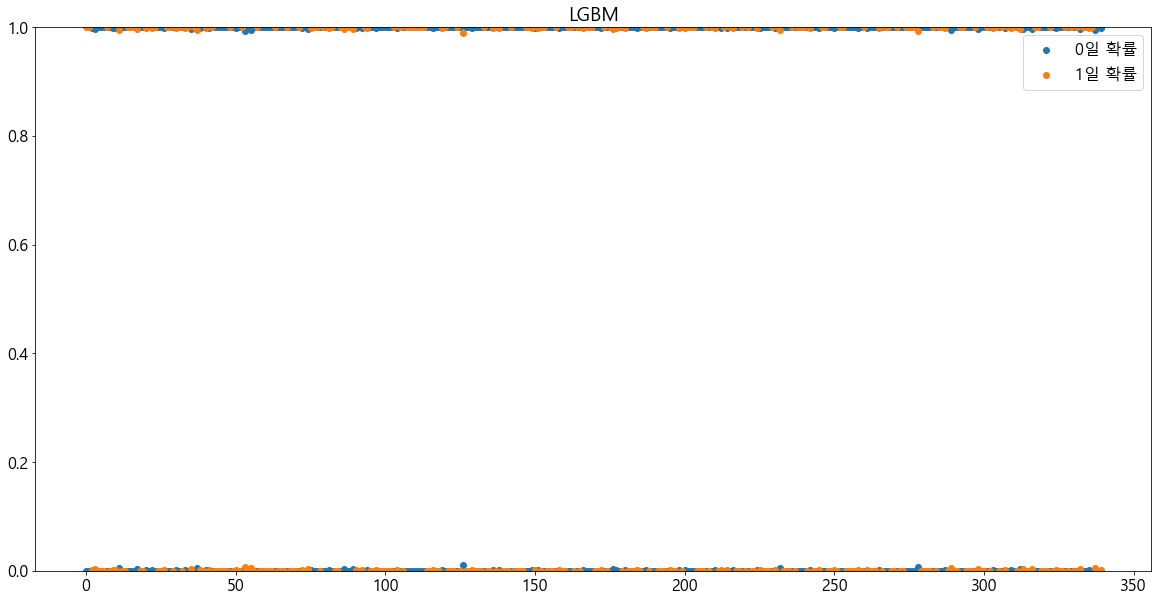

In [28]:
proba1 = best_model3.predict_proba(X_train)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('LGBM')
plt.legend()
plt.ylim(0, 1)
plt.show()

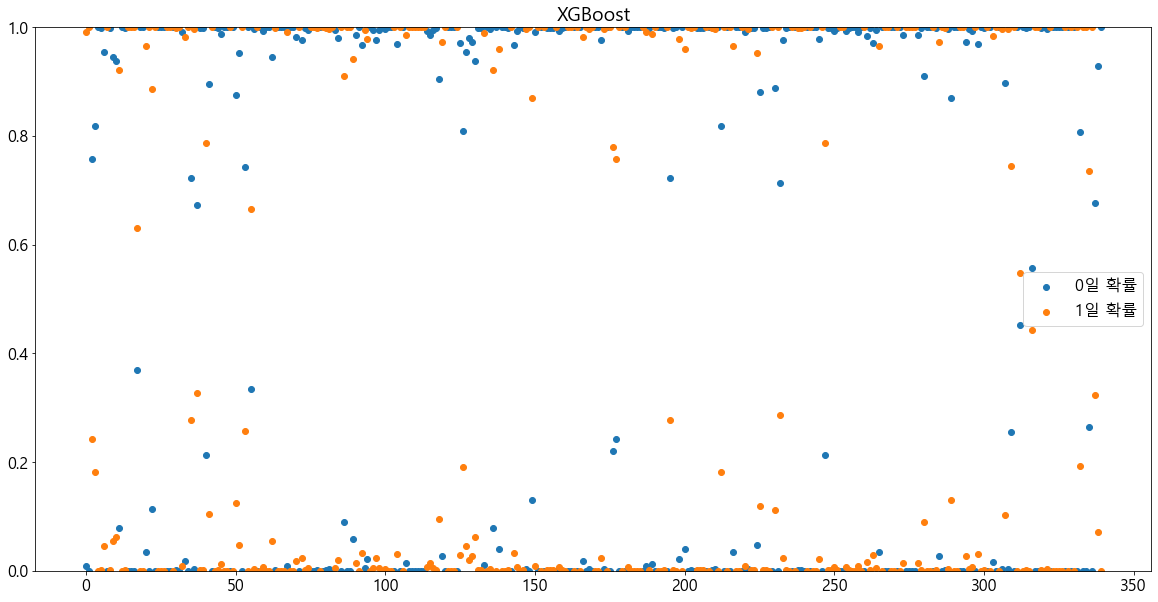

In [29]:
proba1 = best_model4.predict_proba(X_train)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('XGBoost')
plt.legend()
plt.ylim(0, 1)
plt.show()

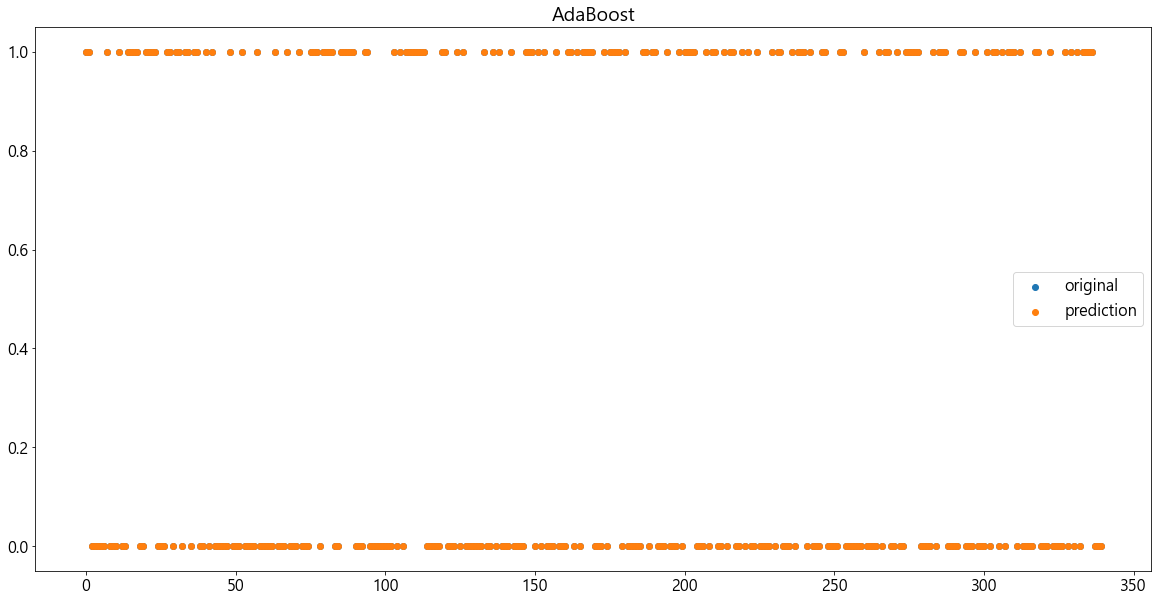

In [30]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_train))), y_train, label='original')
plt.scatter(list(range(len(y_pred1))), y_pred1, label='prediction')
plt.title('AdaBoost')
plt.legend()
plt.show()

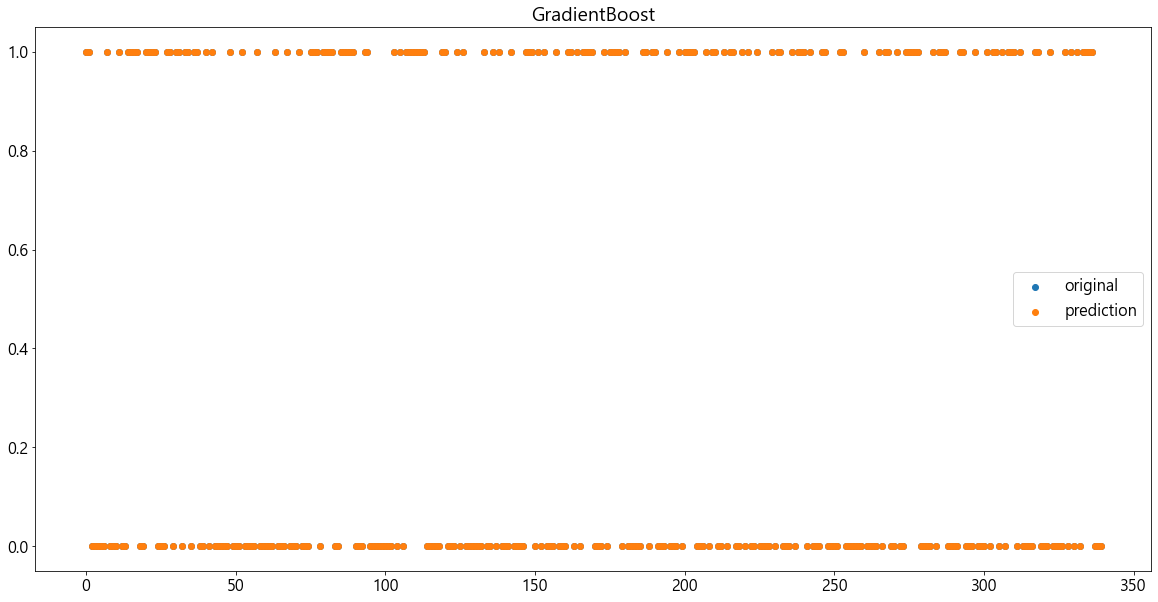

In [32]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_train))), y_train, label='original')
plt.scatter(list(range(len(y_pred2))), y_pred2, label='prediction')
plt.title('GradientBoost')
plt.legend()
plt.show()

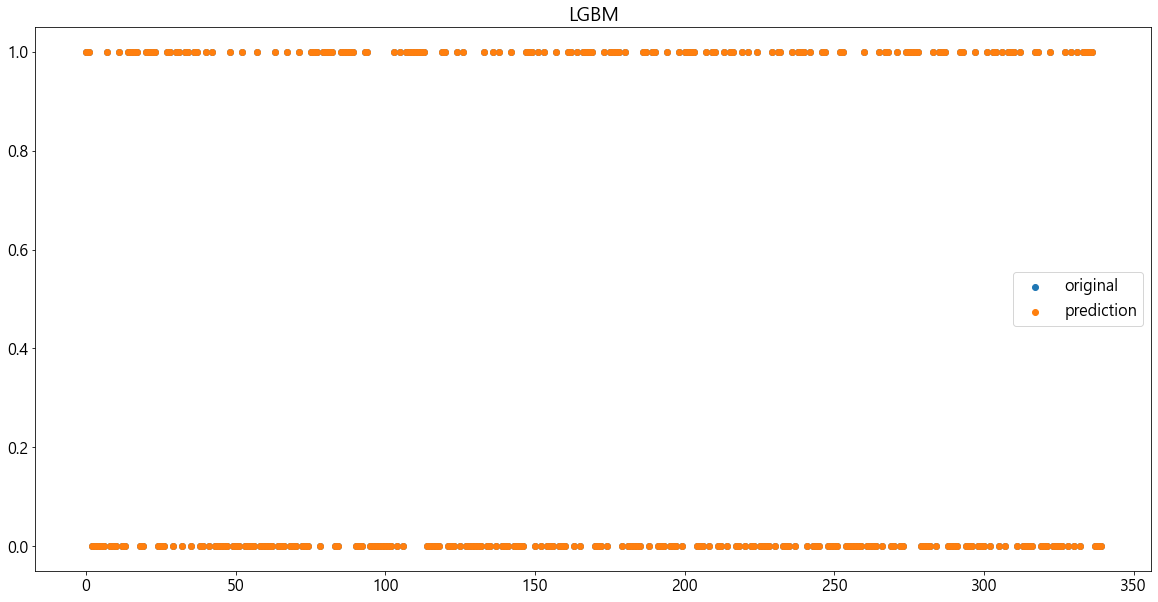

In [33]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_train))), y_train, label='original')
plt.scatter(list(range(len(y_pred3))), y_pred3, label='prediction')
plt.title('LGBM')
plt.legend()
plt.show()

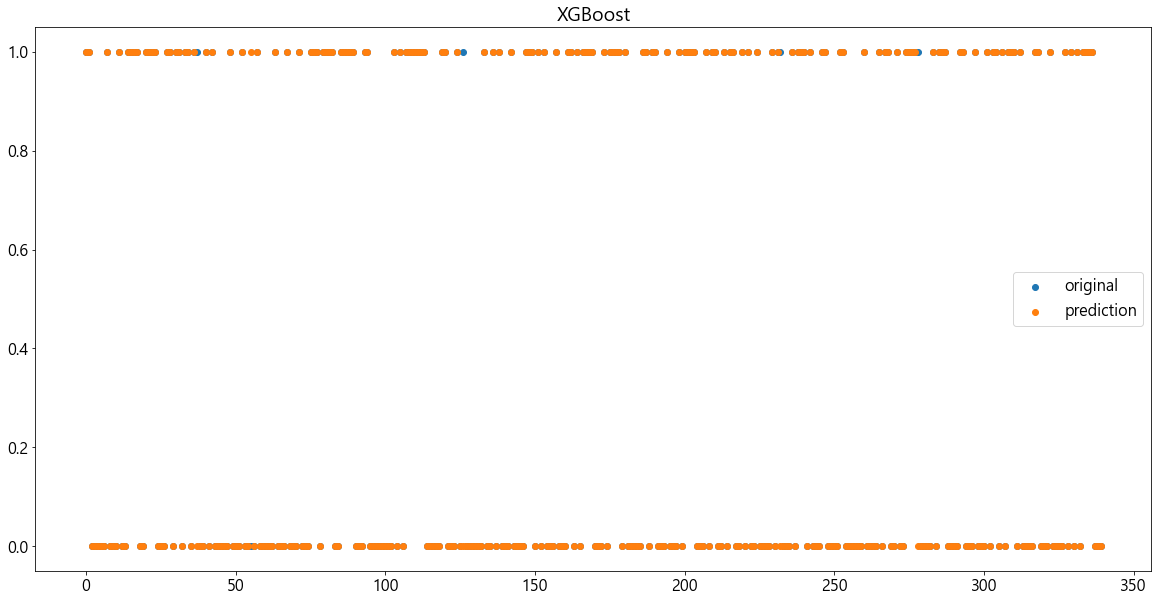

In [34]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_train))), y_train, label='original')
plt.scatter(list(range(len(y_pred4))), y_pred4, label='prediction')
plt.title('XGBoost')
plt.legend()
plt.show()

In [35]:
# 검증용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_test)
y_pred2 = best_model2.predict(X_test)
y_pred3 = best_model3.predict(X_test)
y_pred4 = best_model4.predict(X_test)

In [36]:
r1 = accuracy_score(y_test, y_pred1)
r2 = precision_score(y_test, y_pred1)
r3 = recall_score(y_test, y_pred1)
r4 = f1_score(y_test, y_pred1)
r5 = roc_auc_score(y_test, y_pred1)

print('AdaBoost 검증 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

AdaBoost 검증 데이터 평가
accuracy : 0.9473684210526315
precision : 0.9090909090909091
recall : 0.9523809523809523
f1 : 0.9302325581395349
roc_auc : 0.9484126984126984


In [37]:
r1 = accuracy_score(y_test, y_pred2)
r2 = precision_score(y_test, y_pred2)
r3 = recall_score(y_test, y_pred2)
r4 = f1_score(y_test, y_pred2)
r5 = roc_auc_score(y_test, y_pred2)

print('GradientBoost 검증 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

GradientBoost 검증 데이터 평가
accuracy : 0.9473684210526315
precision : 0.9090909090909091
recall : 0.9523809523809523
f1 : 0.9302325581395349
roc_auc : 0.9484126984126984


In [40]:
r1 = accuracy_score(y_test, y_pred3)
r2 = precision_score(y_test, y_pred3)
r3 = recall_score(y_test, y_pred3)
r4 = f1_score(y_test, y_pred3)
r5 = roc_auc_score(y_test, y_pred3)

print('LGBM 검증 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

LGBM 검증 데이터 평가
accuracy : 0.9473684210526315
precision : 0.9090909090909091
recall : 0.9523809523809523
f1 : 0.9302325581395349
roc_auc : 0.9484126984126984


In [41]:
r1 = accuracy_score(y_test, y_pred4)
r2 = precision_score(y_test, y_pred4)
r3 = recall_score(y_test, y_pred4)
r4 = f1_score(y_test, y_pred4)
r5 = roc_auc_score(y_test, y_pred4)

print('XGBoost 검증 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

XGBoost 검증 데이터 평가
accuracy : 0.9736842105263158
precision : 0.975609756097561
recall : 0.9523809523809523
f1 : 0.963855421686747
roc_auc : 0.9692460317460317


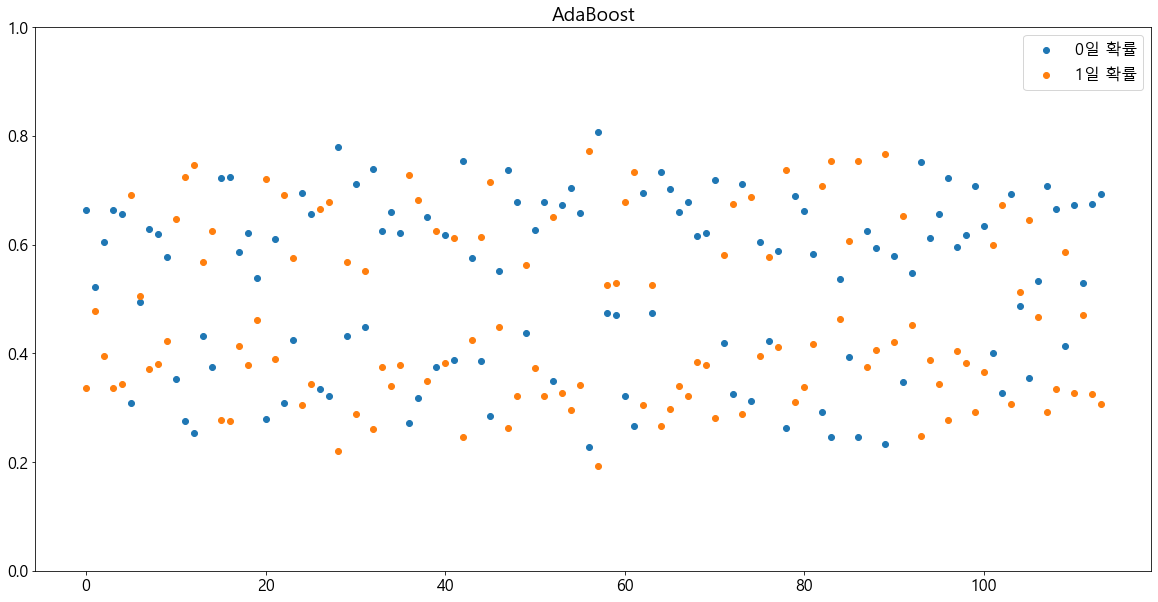

In [43]:
proba1 = best_model1.predict_proba(X_test)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('AdaBoost')
plt.legend()
plt.ylim(0, 1)
plt.show()

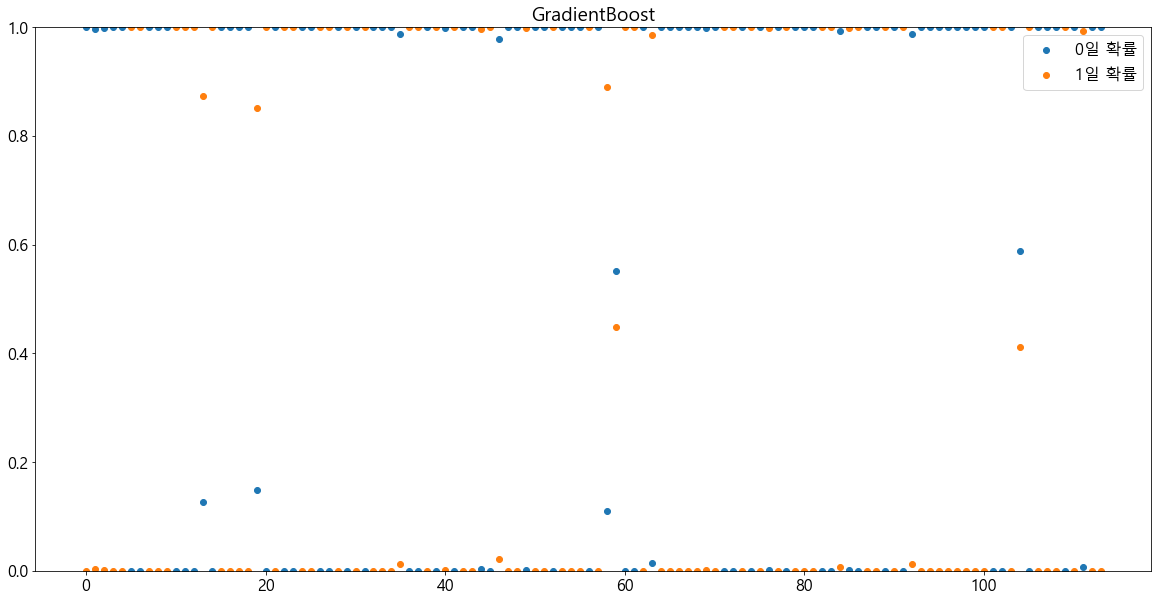

In [44]:
proba1 = best_model2.predict_proba(X_test)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('GradientBoost')
plt.legend()
plt.ylim(0, 1)
plt.show()

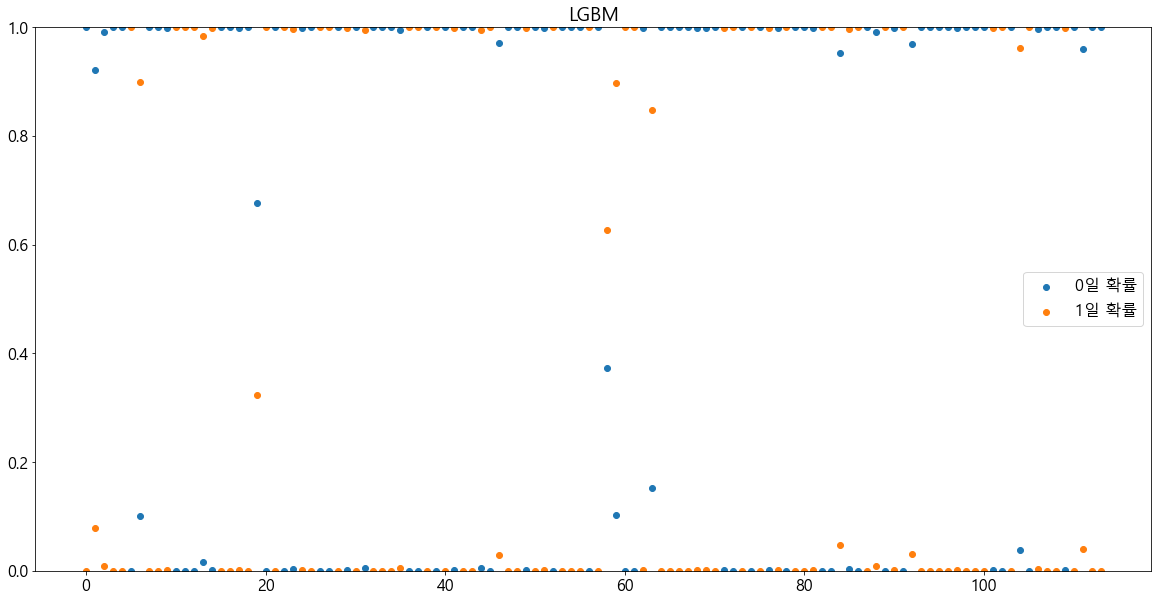

In [45]:
proba1 = best_model3.predict_proba(X_test)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('LGBM')
plt.legend()
plt.ylim(0, 1)
plt.show()

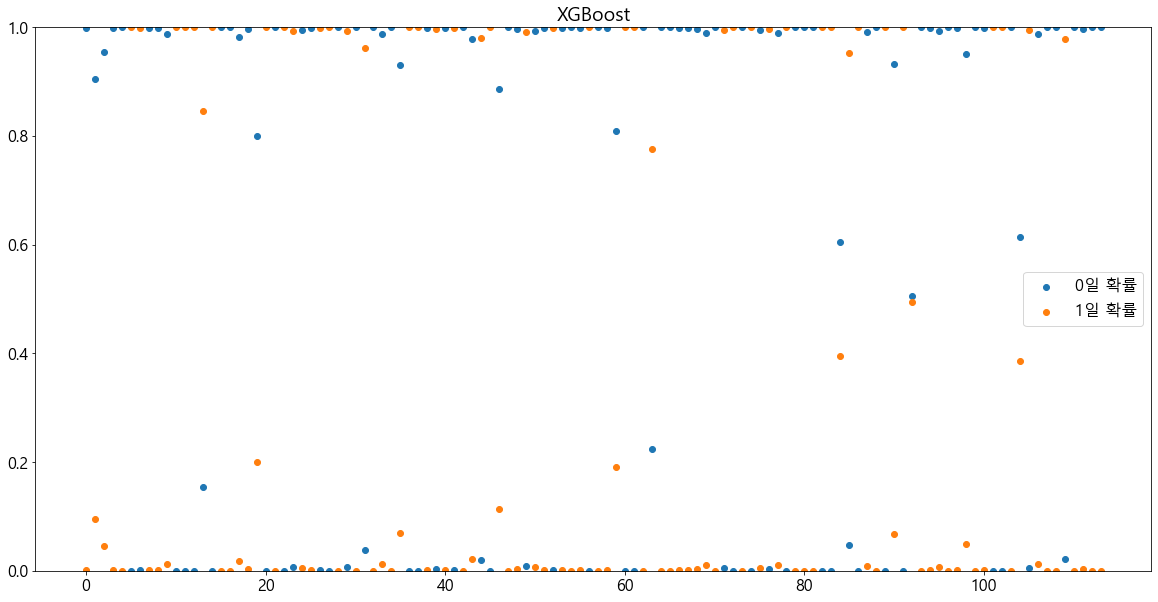

In [46]:
proba1 = best_model4.predict_proba(X_test)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('XGBoost')
plt.legend()
plt.ylim(0, 1)
plt.show()

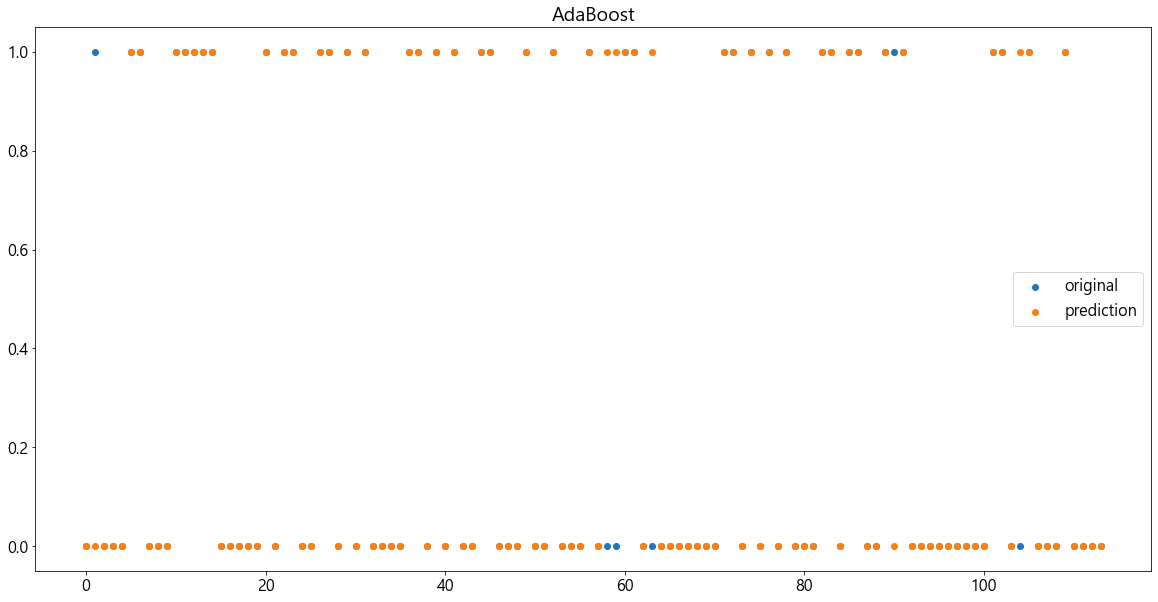

In [47]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_test))), y_test, label='original')
plt.scatter(list(range(len(y_pred1))), y_pred1, label='prediction')
plt.title('AdaBoost')
plt.legend()
plt.show()

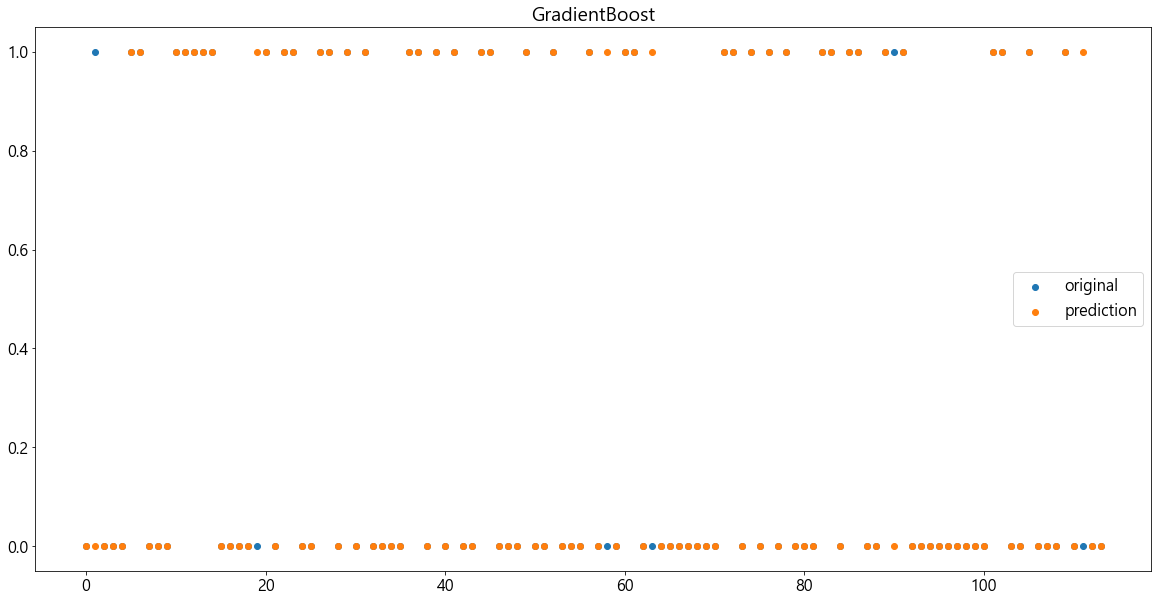

In [48]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_test))), y_test, label='original')
plt.scatter(list(range(len(y_pred2))), y_pred2, label='prediction')
plt.title('GradientBoost')
plt.legend()
plt.show()

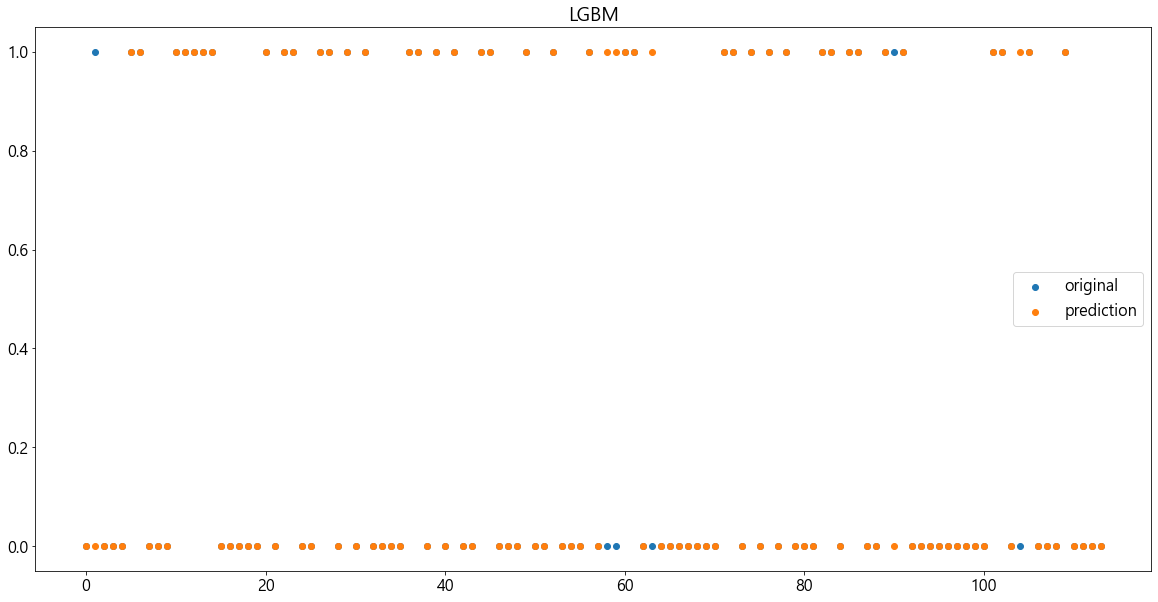

In [49]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_test))), y_test, label='original')
plt.scatter(list(range(len(y_pred3))), y_pred3, label='prediction')
plt.title('LGBM')
plt.legend()
plt.show()

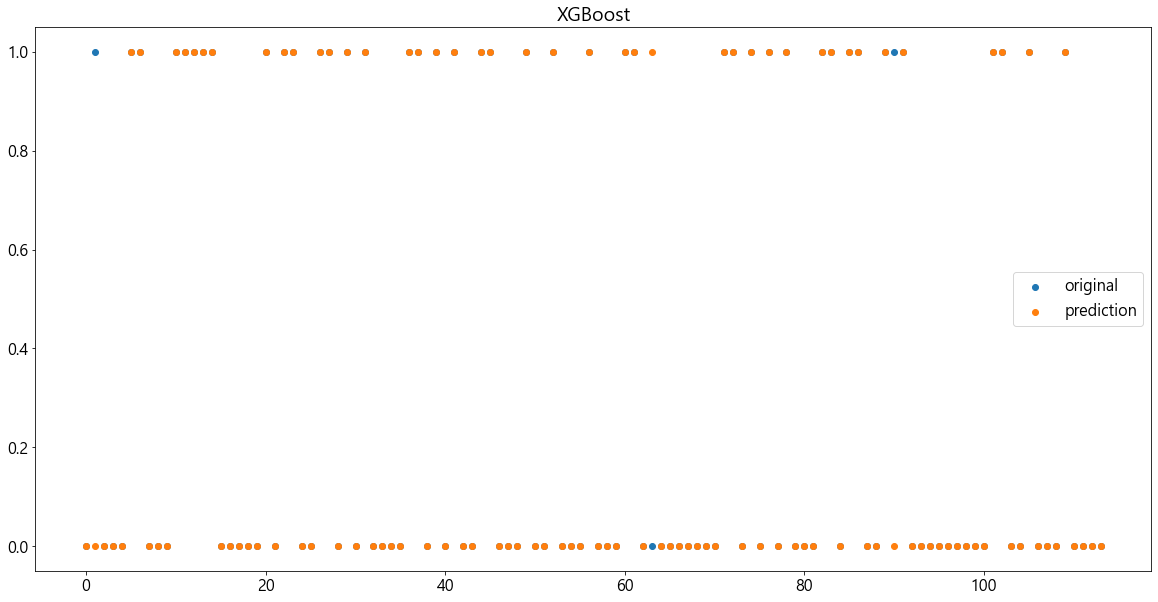

In [50]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_test))), y_test, label='original')
plt.scatter(list(range(len(y_pred4))), y_pred4, label='prediction')
plt.title('XGBoost')
plt.legend()
plt.show()

### 전체 데이터를 학습시킨다.

In [51]:
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=12, num_parallel_tree=None,
              predictor=None, random_state=1, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, silent=True, subsample=None, tree_method=None,
              validate_parameters=1, verbosity=0)

### 새로 발생된 데이터를 예측한다.

In [52]:
df2 = pd.read_csv('data/breast_cancer_new.csv')
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [53]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [54]:
# 예측한다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)

In [55]:
# 문자열로 변환한다.
target1 = encoder1.inverse_transform(y_pred1)
target2 = encoder1.inverse_transform(y_pred2)
target3 = encoder1.inverse_transform(y_pred3)
target4 = encoder1.inverse_transform(y_pred4)

In [56]:
# 저장한다.
df2['target'] = target1
df2.to_csv('data/breast_cancer_AdaBoost.csv')

df2['target'] = target2
df2.to_csv('data/breast_cancer_GradientBoost.csv')

df2['target'] = target3
df2.to_csv('data/breast_cancer_LGBM.csv')

df2['target'] = target4
df2.to_csv('data/breast_cancer_XGBoost.csv')